# 1. Introduction

Since I have gotten well acquainted with Toronto in our last couple of assignments, I would like to stay there for this one too. Toronto is a large city with over 5mil of residents. In such a large city like Toronto it might be difficult to figure out what neighborhoods to concentrate on in your search to buy a new home. When searching for a house, one might want to concentrate on neighborhoods with low crime rates, average density of population, access to parks and playgrounds, as well as restaurants and coffee shops. All those criteria are usually considered with a certain budget in mind. I have visited Toronto 2 times and I have stayed with my cousins in the Forest Hill South neighborhood, so I will take that as a point of reference for a comfortable, safe, enjoyable living, and try to find other neighborhoods in Toronto that are similar to Forest Hill South, but are more affordable (have an average home price of less than $800,000). 


In [0]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means 
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# 2. Crime data, population density and boundar coordinates data were obtained from Toronto Police Open Data Portal:
https://data.torontopolice.on.ca/datasets/af500b5abb7240399853b35a2362d0c0_0?geometry=-80.098%2C43.542%2C-78.659%2C43.890

### Reading the geojson file:

In [0]:
with open('Neighbourhood_Crime_Rates_Boundary_File_.geojson') as json_data:
    toronto_crime_json = json.load(json_data)

In [0]:
toronto_crime_json

In [0]:
toronto_crime = toronto_crime_json['features']

In [0]:
toronto_crime[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'Neighbourhood_Crime_Rates_Neigh': 'Yonge-St.Clair',
  'Neighbourhood_Crime_Rates_Hood_': '097',
  'Hood_ID': 97,
  'Neighbourhood': 'Yonge-St.Clair',
  'Assault_2014': 58,
  'Assault_2015': 38,
  'Assault_2016': 51,
  'Assault_2017': 46,
  'Assault_2018': 61,
  'Assault_AVG': 50.8,
  'Assault_CHG': '33%',
  'Assault_Rate_2018': 1912.8,
  'Auto_Theft_2014': 28,
  'Auto_Theft_2015': 32,
  'Auto_Theft_2016': 22,
  'Auto_Theft_2017': 46,
  'Auto_Theft_2018': 69,
  'AutoTheft_AVG': 39.4,
  'AutoTheft_CHG': '50%',
  'AutoTheft_Rate_2018': 2163.7,
  'BreakandEnter_2014': 29,
  'BreakandEnter_2015': 16,
  'BreakandEnter_2016': 28,
  'BreakandEnter_2017': 32,
  'BreakandEnter_2018': 23,
  'BreakandEnter_AVG': 25.6,
  'BreakandEnter_CHG': '-28%',
  'BreakandEnter_Rate_2018': 721.2,
  'Robbery_2014': 12,
  'Robbery_2015': 25,
  'Robbery_2016': 14,
  'Robbery_2017': 21,
  'Robbery_2018': 19,
  'Robbery_AVG': 18.2,
  'Robbery_CHG': '-10%',
  'Ro

In [0]:
column_names = ['Neighbourhood', 'Assault_Rate_2018', 
                'AutoTheft_Rate_2018', 'BreakandEnter_Rate_2018', 
                'Robbery_Rate_2018', 'Homicide_Rate_2018', 'Population', "Size_of_hood_area",
                "Latitude","Longitude"]

In [0]:
hood_crime = pd.DataFrame(columns=column_names)
hood_crime

,Neighbourhood,Assault_Rate_2018,AutoTheft_Rate_2018,BreakandEnter_Rate_2018,Robbery_Rate_2018,Homicide_Rate_2018,Population,Size_of_hood_area,Latitude,Longitude


### Extracting the following properties from the geojson file: 'Neighbourhood', 'Assault_Rate_2018', 'AutoTheft_Rate_2018', 'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'Homicide_Rate_2018', 'Population', "Size_of_hood_area", "Latitude", "Longitude", and converting boundary data into the central coordinates point for each neighbourhood.

In [0]:
for data in toronto_crime: 
    neighborhood = data['properties']['Neighbourhood']
    assault = data['properties']['Assault_Rate_2018']
    auto_theft = data['properties']['AutoTheft_Rate_2018']
    breakandenter = data['properties']['BreakandEnter_Rate_2018']
    robbery = data['properties']['Robbery_Rate_2018']
    homicide = data['properties']['Homicide_Rate_2018']
    population = data['properties']['Population']
    area = data["properties"]['Shape__Area']
    lats = []
    lons = []
    neighborhood_latlon_boundary = data['geometry']['coordinates']
    for item in neighborhood_latlon_boundary[0]:
        lats.append(item[1])
        lons.append(item[0])
    neighborhood_lat = np.array(lats).mean()
    neighborhood_lon = np.array(lons).mean()
    hood_crime = hood_crime.append({'Neighbourhood': neighborhood,
                                          'Assault_Rate_2018': assault,
                                          'AutoTheft_Rate_2018': auto_theft,
                                          'BreakandEnter_Rate_2018': breakandenter,
                                          'Robbery_Rate_2018': robbery,
                                          'Homicide_Rate_2018': homicide,
                                          'Population': population,
                                            "Size_of_hood_area": area,
                                        "Latitude": neighborhood_lat,
                                   "Longitude": neighborhood_lon}, ignore_index=True)

In [0]:
hood_crime[0:10]

,Neighbourhood,Assault_Rate_2018,AutoTheft_Rate_2018,BreakandEnter_Rate_2018,Robbery_Rate_2018,Homicide_Rate_2018,Population,Size_of_hood_area,Latitude,Longitude
0,Yonge-St.Clair,1912.8,2163.7,721.2,595.8,0,3189,1.161315e+06,43.688762,-79.399013
1,York University Heights,375.4,62.6,141.4,40.8,2.7,36764,1.324666e+07,43.759661,-79.499115
2,Lansing-Westgate,1923.5,214.8,507.7,400.3,0,10242,5.346186e+06,43.753880,-79.422502
3,Yorkdale-Glen Park,696.5,153.6,307.1,192.0,11,18233,6.038326e+06,43.717458,-79.452711
4,Stonegate-Queensway,576.4,184.6,184.6,162.1,0,22207,7.946202e+06,43.636838,-79.496012
5,Tam O'Shanter-Sullivan,128.2,105.3,41.2,25.2,2.3,43695,5.422345e+06,43.779365,-79.306608
6,The Beaches,1610.4,77.5,831.6,274.9,0,28378,3.595829e+06,43.668305,-79.294287
7,Thistletown-Beaumond Heights,187.0,155.9,155.9,49.9,12.5,16039,3.339481e+06,43.737721,-79.558346
8,Thorncliffe Park,1616.4,1364.9,718.4,502.9,0,8352,3.126554e+06,43.707124,-79.348242
9,Danforth East York,2165.0,1487.8,1096.8,314.7,0,10485,2.188598e+06,43.689215,-79.331051


### Creating Toronto Map using Folium.

In [0]:
import folium
latitude = 43.697786
longitude = -79.362862
toronto_crime_map = folium.Map(location=[latitude, longitude], zoom_start=11)

In [0]:
toronto_crime_map

In [0]:
from folium.features import DivIcon
from folium import IFrame

### Plotting Neighbourhoods using Population as Circle size 

In [0]:
# create map of New York using latitude and longitude values
toronto_hood_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, population in zip(hood_crime['Latitude'], 
                                              hood_crime['Longitude'], 
                                              hood_crime['Neighbourhood'],
                                             hood_crime['Population']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(population/300),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_hood_map)  

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.08)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Population of Neighbourhood </div>',
        )
    ).add_to(toronto_hood_map)

text = 'Forest Hill South'

iframe = folium.IFrame(text, width=20, height=15)
popup = folium.Popup(iframe, max_width=3000, show=True)

# Text = folium.Marker(location=[43.694286, -79.412848], popup=popup,
#                      icon=folium.Icon(icon_color='green'))
# toronto_hood_map.add_child(Text)
# toronto_hood_map

toronto_hood_map

In [0]:
hood_crime.columns

Index(['Neighbourhood', 'Assault_Rate_2018', 'AutoTheft_Rate_2018',
       'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'Homicide_Rate_2018',
       'Population', 'Size_of_hood_area', 'Latitude', 'Longitude'],
      dtype='object')

### Creating "per capita" variables for each crime feature.

In [0]:
hood_crime["Assault_per_capita"] = hood_crime['Assault_Rate_2018']/hood_crime['Population']
hood_crime["AutoTheft_per_capita"] = hood_crime['AutoTheft_Rate_2018']/hood_crime['Population']
hood_crime['BreakandEnter_per_capita'] = hood_crime['BreakandEnter_Rate_2018']/hood_crime['Population']
hood_crime['Robbery_per_capita'] = hood_crime['Robbery_Rate_2018']/hood_crime['Population']
hood_crime['Homicide_per_capita'] = hood_crime['Homicide_Rate_2018']/hood_crime['Population']


### Plotting Neighbourhoods using "Robbery_per_capita" as Circle size 

In [0]:
# create map of New York using latitude and longitude values
toronto_hood_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, robbery in zip(hood_crime['Latitude'], 
                                              hood_crime['Longitude'], 
                                              hood_crime['Neighbourhood'],
                                             hood_crime['Robbery_per_capita']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(robbery*3000),
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_hood_map)  
folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Robbery per capita </div>',
        )
    ).add_to(toronto_hood_map)


toronto_hood_map

### Plotting Neighbourhoods using "Assault_per_capita" as Circle size 

In [0]:
# create map of New York using latitude and longitude values
toronto_hood_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, crime in zip(hood_crime['Latitude'], 
                                              hood_crime['Longitude'], 
                                              hood_crime['Neighbourhood'],
                                             hood_crime['Assault_per_capita']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(crime*500),
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_hood_map)  
folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Assault per capita </div>',
        )
    ).add_to(toronto_hood_map)


toronto_hood_map

### Cleaning the dataframe, exploring features

In [0]:
hood_crime.drop(['Assault_Rate_2018', 'AutoTheft_Rate_2018',
       'BreakandEnter_Rate_2018', 'Robbery_Rate_2018', 'Homicide_Rate_2018'], axis=1, inplace=True)

In [0]:
hood_crime["Population_Density"] = hood_crime["Population"]/hood_crime["Size_of_hood_area"]*1000

In [0]:
hood_crime.head()

,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density
0,Yonge-St.Clair,3189,1.161315e+06,43.688762,-79.399013,0.599812,0.678489,0.226152,0.18683,0,2.74603
1,York University Heights,36764,1.324666e+07,43.759661,-79.499115,0.0102111,0.00170275,0.00384615,0.00110978,7.34414e-05,2.77534
2,Lansing-Westgate,10242,5.346186e+06,43.753880,-79.422502,0.187805,0.0209725,0.0495704,0.0390842,0,1.91576
3,Yorkdale-Glen Park,18233,6.038326e+06,43.717458,-79.452711,0.0382,0.00842429,0.0168431,0.0105304,0.000603302,3.01955
4,Stonegate-Queensway,22207,7.946202e+06,43.636838,-79.496012,0.0259558,0.00831269,0.00831269,0.0072995,0,2.79467


In [0]:
from scipy import stats
stats.pearsonr(hood_crime["Population_Density"], hood_crime["Assault_per_capita"])

(-0.2262069593676606, 0.007200028178117193)

Text(0.5, 0, 'Population Density')

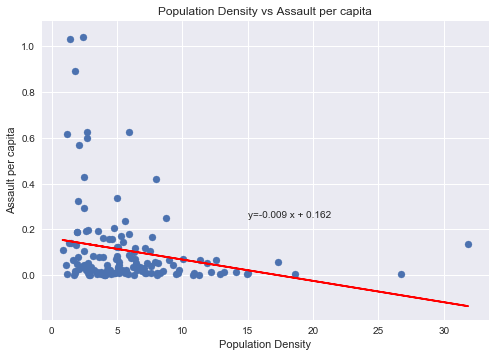

In [0]:
fit = np.polyfit(hood_crime["Population_Density"].astype(float), hood_crime['Assault_per_capita'].astype(float), deg=1)
plt.scatter(hood_crime["Population_Density"], hood_crime['Assault_per_capita'])
plt.plot(hood_crime["Population_Density"], fit[0] * hood_crime["Population_Density"] + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(15,.25))
plt.title("Population Density vs Assault per capita")
plt.ylabel("Assault per capita")
plt.xlabel("Population Density")

In [0]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hood_crime["Population_Density"].astype(float), hood_crime['Assault_per_capita'].astype(float))
p_value


0.007200028178117155

### Plotting Neighbourhoods where the Circle Size represents Population_Density

In [0]:
# create map of Toronto using latitude and longitude values
toronto_hood_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, pop_density in zip(hood_crime['Latitude'], 
                                              hood_crime['Longitude'], 
                                              hood_crime['Neighbourhood'],
                                             hood_crime['Population_Density']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(pop_density*10),
        popup=label,
        color='#805B13',
        fill=True,
        fill_color='#E9A625',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_hood_map)  

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Population Density </div>',
        )
    ).add_to(toronto_hood_map)
    
toronto_hood_map

In [0]:
hood_crime.columns

Index(['Neighbourhood', 'Population', 'Size_of_hood_area', 'Latitude',
       'Longitude', 'Assault_per_capita', 'AutoTheft_per_capita',
       'BreakandEnter_per_capita', 'Robbery_per_capita', 'Homicide_per_capita',
       'Population_Density'],
      dtype='object')

### Querying Foursquare API for information about nearby venues for each neighbourhood

In [1]:
CLIENT_ID = 'OQMW5IHQXDZJ3A1FMOFPIJEXKCQ5I3MYPDQ2PVCSRAVDR5WE' # your Foursquare ID
CLIENT_SECRET = 'CWGPFHHGQ4EDEHSVTU3W1ZS3SEJVKM1RYZRZWCEAR1YEFHAL' # your Foursquare Secret
LIMIT = 100
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OQMW5IHQXDZJ3A1FMOFPIJEXKCQ5I3MYPDQ2PVCSRAVDR5WE
CLIENT_SECRET:CWGPFHHGQ4EDEHSVTU3W1ZS3SEJVKM1RYZRZWCEAR1YEFHAL


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
toronto_venues = getNearbyVenues(names=hood_crime['Neighbourhood'],
                                   latitudes=hood_crime['Latitude'],
                                   longitudes=hood_crime['Longitude']
                                  )

Yonge-St.Clair
York University Heights
Lansing-Westgate
Yorkdale-Glen Park
Stonegate-Queensway
Tam O'Shanter-Sullivan
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Danforth East York
Humewood-Cedarvale
Islington-City Centre West
Danforth
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Taylor-Massey
Humber Summit
Humbermede
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Cliffcrest
Flemingdon Park
Corso Italia-Davenport
Ionview
Junction Area
Broadview North
Princess-Rosethorn
North Riverdale
Etobicoke West Mall
Forest Hill North
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Trinity-Bellwoods
Victoria Village
Waterfront Communities-The Island
West Hill
West Humber-Clairville
Westminster-Branson
Kennedy Park
Kingsview Village-The Westway
Bayview Woods-Steeles
Clanton Park
Keelesdale-Eglinton West
O'Connor-Parkview
Old East York
Casa Loma
Kensington-Chinatown
Kingsway South
Runnymede-Bloor West Village
Forest Hill South
Henry

In [0]:
print(toronto_venues.shape)
toronto_venues.head(10)

(10922, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yonge-St.Clair,43.688762,-79.399013,LCBO,43.686991,-79.399238,Liquor Store
1,Yonge-St.Clair,43.688762,-79.399013,The Bagel House,43.687374,-79.393696,Bagel Shop
2,Yonge-St.Clair,43.688762,-79.399013,Cava Restaurant,43.689809,-79.394932,Tapas Restaurant
3,Yonge-St.Clair,43.688762,-79.399013,Waxon Waxbar,43.682824,-79.391971,Spa
4,Yonge-St.Clair,43.688762,-79.399013,DAVIDsTEA,43.688376,-79.394158,Tea Room
5,Yonge-St.Clair,43.688762,-79.399013,Scaramouche,43.681293,-79.399492,French Restaurant
6,Yonge-St.Clair,43.688762,-79.399013,The Market By Longo’s,43.686711,-79.399536,Supermarket
7,Yonge-St.Clair,43.688762,-79.399013,Boxcar Social,43.681750,-79.391447,Coffee Shop
8,Yonge-St.Clair,43.688762,-79.399013,LCBO,43.681497,-79.391261,Liquor Store
9,Yonge-St.Clair,43.688762,-79.399013,9bars,43.688660,-79.391940,Café


In [0]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt North,63,63,63,63,63,63
Agincourt South-Malvern West,100,100,100,100,100,100
Alderwood,100,100,100,100,100,100
Annex,100,100,100,100,100,100
Banbury-Don Mills,100,100,100,100,100,100
Bathurst Manor,47,47,47,47,47,47
Bay Street Corridor,100,100,100,100,100,100
Bayview Village,68,68,68,68,68,68
Bayview Woods-Steeles,39,39,39,39,39,39


In [0]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 347 uniques categories.


### One-hot encoding of venue category data

In [0]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

#move neighborhood column to the first column
fixed_columns = ["Neighbourhood"] + list(toronto_onehot.columns.difference(['Neighbourhood']))
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Resta

In [0]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').sum().reset_index()
toronto_grouped.shape

(140, 348)

### Merge Crime Data with Venue Data

In [0]:
crime_venues = hood_crime.merge(toronto_grouped, on ="Neighbourhood", how="left")

In [0]:
crime_venues.head()

,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing 

In [0]:
crime_venues.replace(np.nan, 0.0, inplace=True)

In [0]:
crime_venues.head()

,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing 

In [0]:
crime_venues.columns

Index(['Neighbourhood', 'Population', 'Size_of_hood_area', 'Latitude',
       'Longitude', 'Assault_per_capita', 'AutoTheft_per_capita',
       'BreakandEnter_per_capita', 'Robbery_per_capita', 'Homicide_per_capita',
       ...
       'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar', 'Wine Bar',
       'Wings Joint', 'Women's Store', 'Xinjiang Restaurant', 'Yoga Studio',
       'Zoo', 'Zoo Exhibit'],
      dtype='object', length=358)

# Create the Feature Dataset

In [0]:
X_orig = crime_venues.drop(['Neighbourhood', 
                            'Population', 'Size_of_hood_area', 'Latitude', 'Longitude'], axis=1)

In [0]:
X_orig.head()

,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbersh

### Normalizing the features and scaling down the weights of crime (to 1/5) and venue category (1/347) features

In [0]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_orig)
X_norm

array([[ 2.68883342e+00,  8.08319809e+00,  1.26690664e+00, ...,
         1.04330119e+00, -1.20385853e-01, -8.48188930e-02],
       [-5.28361782e-01, -3.69631069e-01, -3.56719898e-01, ...,
        -5.44331054e-01, -1.20385853e-01, -8.48188930e-02],
       [ 4.40691714e-01, -1.28958766e-01, -2.27702438e-02, ...,
         1.04330119e+00, -1.20385853e-01, -8.48188930e-02],
       ...,
       [-4.49115979e-01, -2.42495450e-01, -3.12199300e-01, ...,
         1.04330119e+00, -1.20385853e-01, -8.48188930e-02],
       [ 1.76527536e+00,  7.44427034e-01, -4.63165684e-04, ...,
        -5.44331054e-01, -1.20385853e-01, -8.48188930e-02],
       [-5.67115281e-01, -3.74485138e-01, -3.37655743e-01, ...,
        -5.44331054e-01, -1.20385853e-01, -8.48188930e-02]])

In [0]:
X_norm.shape

(140, 353)

In [0]:
weight1 = np.ones((5,))
weight1 = weight1 / 5
weight2 = list(weight1) + [1]
weight3 = np.ones((347,))
weight3 = weight3 / 347
weight3[0:10]

array([0.00288184, 0.00288184, 0.00288184, 0.00288184, 0.00288184,
       0.00288184, 0.00288184, 0.00288184, 0.00288184, 0.00288184])

In [0]:
weights = np.array(list(weight2) + list(weight3))
weights[0:10]

array([0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
       1.        , 0.00288184, 0.00288184, 0.00288184, 0.00288184])

In [0]:
X_norm = X_norm*weights

In [0]:
X_norm

array([[ 5.37766684e-01,  1.61663962e+00,  2.53381328e-01, ...,
         3.00663166e-03, -3.46933294e-04, -2.44434850e-04],
       [-1.05672356e-01, -7.39262138e-02, -7.13439795e-02, ...,
        -1.56867739e-03, -3.46933294e-04, -2.44434850e-04],
       [ 8.81383428e-02, -2.57917533e-02, -4.55404875e-03, ...,
         3.00663166e-03, -3.46933294e-04, -2.44434850e-04],
       ...,
       [-8.98231959e-02, -4.84990900e-02, -6.24398601e-02, ...,
         3.00663166e-03, -3.46933294e-04, -2.44434850e-04],
       [ 3.53055073e-01,  1.48885407e-01, -9.26331367e-05, ...,
        -1.56867739e-03, -3.46933294e-04, -2.44434850e-04],
       [-1.13423056e-01, -7.48970276e-02, -6.75311485e-02, ...,
        -1.56867739e-03, -3.46933294e-04, -2.44434850e-04]])

### Testing the number of clusters to be used in final analysis using the distortion function

In [0]:
distortions = []
ks = []
for kclusters in range (1,10):
    kmeans = KMeans(n_clusters=kclusters, random_state=21).fit(X_norm)
    ks.append(kclusters)
    distortions.append(kmeans.inertia_)
    ks_distortions = pd.DataFrame({'Number of Clusters': ks, 'Distortion': distortions})
ks_distortions

,Number of Clusters,Distortion
0,1,168.403458
1,2,86.178619
2,3,57.331755
3,4,41.576499
4,5,29.363811
5,6,23.483741
6,7,19.838553
7,8,16.936755
8,9,15.097264


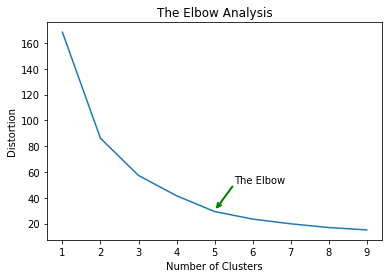

In [0]:
import matplotlib.pylab as plt
plt.plot(ks_distortions["Number of Clusters"], ks_distortions["Distortion"])
plt.title("The Elbow Analysis")
plt.ylabel("Distortion")
plt.xlabel("Number of Clusters")
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(5, 30),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(5.5, 50),         # place base of the arrow at point (year 2008 , pop 20)
#              xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2)
            )

# Annotate Text
plt.annotate('The Elbow', # text to display
             xy=(5.5, 50),                    # start the text at at point (year 2008 , pop 30)
#              rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )




plt.show()

### Segmenting the data into the optimally chosen 5 clusters using k-means clustering

In [0]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=21).fit(X_norm)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_)
print(kmeans.inertia_)

[3 0 0 0 0 4 4 0 0 0 4 0 1 0 0 1 0 0 4 0 0 0 2 0 0 4 4 4 3 0 0 0 3 4 0 4 0
 1 0 4 0 0 4 0 0 0 0 4 0 4 4 4 0 1 0 0 4 4 0 4 4 0 0 0 0 4 0 4 3 4 4 0 2 4
 4 1 0 0 3 0 0 4 0 0 0 0 0 1 0 0 1 0 3 4 0 1 0 0 4 1 1 1 4 3 0 0 4 0 4 3 0
 0 4 0 0 4 0 4 0 0 4 4 0 1 4 4 4 4 4 0 1 1 4 4 0 4 0 0 0 0]
29.363810872860665


### Adding Cluster Labels to the Original Dataset with crime and Venue data

In [0]:
cluster_crime_venues = crime_venues.copy()
cluster_crime_venues.insert(0, "Cluster Labels", kmeans.labels_)

### Plotting Clustered Neighbourhoods using Population Density as Circle Size.

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, density in zip(cluster_crime_venues['Latitude'], 
                                  cluster_crime_venues['Longitude'], 
                                  cluster_crime_venues['Neighbourhood'], 
                                  cluster_crime_venues['Cluster Labels'],
                                       cluster_crime_venues['Population_Density']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=np.sqrt(density*10),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Population Density </div>',
        )
    ).add_to(map_clusters)
       
map_clusters

### Plotting Clustered Neighbourhoods using Coffee Shop count as Circle Size.

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cafes in zip(cluster_crime_venues['Latitude'], 
                                  cluster_crime_venues['Longitude'], 
                                  cluster_crime_venues['Neighbourhood'], 
                                  cluster_crime_venues['Cluster Labels'],
                                       cluster_crime_venues['Coffee Shop']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=cafes,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Radius = Number of Cafes </div>',
        )
    ).add_to(map_clusters)
       
map_clusters

### Plotting Clustered Neighbourhoods using Number of Parks as Circle Size.

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, parks in zip(cluster_crime_venues['Latitude'], 
                                  cluster_crime_venues['Longitude'], 
                                  cluster_crime_venues['Neighbourhood'], 
                                  cluster_crime_venues['Cluster Labels'],
                                       cluster_crime_venues['Park']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=parks*2,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
    
folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Radius = Number of Parks </div>',
        )
    ).add_to(map_clusters)
       
map_clusters

# Obtaining and cleaning the data on Average Home Prices in Toronto in 2017, from the following blog post:
https://www.moneysense.ca/spend/real-estate/where-to-buy-2019-toronto/

In [0]:
house_prices_raw = pd.read_html("Where to buy real estate in Toronto in 2019 - MoneySense.html")

In [0]:
house_prices_raw[0]

,Rank,Neighbourhood,Area,Average home price (2017),Value,Momentum,Average price vs. area,Avg. price vs. metro district,Avg. price vs. outer region,1-year price change,5-year price change,Final Star Rating
0,1,Rockcliffe-Smythe,Toronto W03,"$723,575",77.24%,83.77%,97.7%,63.03%,77.7%,6.71%,79.0%,★★★★
1,2,Humber Summit,Toronto W05,"$706,722",84.89%,75.00%,94.2%,60.81%,75.0%,-4.97%,133.4%,★★★★
2,3,Glenfield-Jane Heights,Toronto W05,"$745,701",88.99%,80.78%,92.0%,59.39%,73.3%,-3.66%,168.6%,★★★★
3,4,Keelesdale-Eglinton West,Toronto W03,"$1,204,201",78.54%,78.73%,97.1%,62.67%,77.3%,7.14%,71.8%,★★★★
4,5,Little Portugal,Toronto C01,"$916,466",48.13%,87.13%,89.3%,101.20%,124.8%,1.39%,186.1%,★★★★
5,6,Oakwood-Vaughan,Toronto C03,"$615,053",72.57%,73.69%,51.4%,77.02%,95.0%,7.70%,71.1%,★★★½
6,7,Mount Dennis,Toronto W04,"$1,306,366",99.07%,57.09%,68.0%,51.69%,63.8%,-1.51%,61.0%,★★★½
7,8,Kensington-Chinatown,Toronto C01,"$701,448",37.87%,95.52%,96.8%,109.78%,135.4%,9.62%,473.2%,★★★½
8,9,Oakridge,Toronto E06,"$712,802",93.47%,64.55%,86.8%,58.95%,72.7%,-4.68%,74.4%,★★★½
9,10,Black Creek,Toronto W05,"$730,270",87.50%,67.72%,92.8%,59.90%,73.9%,4.55%,59.1%,★★★½


In [0]:
house_prices = house_prices_raw[0].copy()

In [0]:
house_prices.columns

Index(['Rank', 'Neighbourhood', 'Area', 'Average home price  (2017)', 'Value',
       'Momentum', 'Average price vs. area', 'Avg. price vs. metro  district',
       'Avg. price vs. outer region', '1-year price change',
       '5-year price change', 'Final Star Rating'],
      dtype='object')

In [0]:
house_prices = house_prices[['Neighbourhood','Average home price  (2017)']]

In [0]:
house_prices.sort_values(by="Neighbourhood")[0:10]

,Neighbourhood,Average home price (2017)
94,Agincourt North,"$873,976"
118,Agincourt South-Malvern West,"$958,013"
47,Alderwood,"$873,114"
63,Annex,"$2,115,505"
130,Banbury-Don Mills,"$1,199,256"
56,Bathurst Manor,"$933,915"
79,Bayview Village,"$2,664,929"
129,Bayview Woods-Steeles,"$1,199,256"
71,Bedford Park-Nortown,"$908,743"
38,Beechborough-Greenbrook,"$915,568"


### Merging Average home prices dataset with the crime-and-venues data set with cluster labels

In [0]:
crime_venues_prices_cluster = cluster_crime_venues.merge(house_prices, on="Neighbourhood", how="left")

In [0]:
print(crime_venues_prices_cluster.shape, cluster_crime_venues.shape, house_prices.shape)

(140, 360) (140, 359) (134, 2)


In [0]:
crime_venues_prices_cluster['Average home price  (2017)'] = crime_venues_prices_cluster['Average home price  (2017)'].str.replace("$", "")

In [0]:
crime_venues_prices_cluster['Average home price  (2017)'] = crime_venues_prices_cluster['Average home price  (2017)'].str.replace(",", "")

In [0]:
crime_venues_prices_cluster["Average home price  (2017)"].head()

0        NaN
1    2621947
2    1685373
3     940929
4     822992
Name: Average home price  (2017), dtype: object

In [0]:
crime_venues_prices_cluster[
    'Average home price  (2017)'] = crime_venues_prices_cluster[
    'Average home price  (2017)'].astype(float)

In [0]:
crime_venues_prices_cluster[
    'Average home price  (2017)'] = crime_venues_prices_cluster[
    'Average home price  (2017)'].replace(
    np.nan, crime_venues_prices_cluster['Average home price  (2017)'].mean())

In [0]:
crime_venues_prices_cluster['Average home price  (2017)'].head()

0    1.275567e+06
1    2.621947e+06
2    1.685373e+06
3    9.409290e+05
4    8.229920e+05
Name: Average home price  (2017), dtype: float64

In [0]:
crime_venues_prices_cluster.head()

,Cluster Labels,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road

## Plotting Average Home Prices as the size of circle of clustered Neighbourhoods.

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, house_price in zip(crime_venues_prices_cluster['Latitude'], 
                                  crime_venues_prices_cluster['Longitude'], 
                                  crime_venues_prices_cluster['Neighbourhood'], 
                                  crime_venues_prices_cluster['Cluster Labels'],
                                       crime_venues_prices_cluster['Average home price  (2017)']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + " $" + str(house_price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=np.sqrt(house_price/20000),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.15)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Average home price </div>',
        )
    ).add_to(map_clusters)
       
map_clusters

### Bar graph of home price by cluster

In [0]:
clusters_price_parks_cafes_yoga = pd.DataFrame(
    crime_venues_prices_cluster.groupby(
        "Cluster Labels", as_index=False)[
        "Cluster Labels","Average home price  (2017)", "Park", "Coffee Shop", "Yoga Studio"].describe())
price_parks_cafes_clusters

Cluster Labels                                     \
           count mean  std  min  25%  50%  75%  max   
0           72.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1           14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2            2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0   
3            8.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0   
4           44.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0   

  Average home price  (2017)                                             \
                       count          mean            std           min   
0                       72.0  1.280714e+06  612025.700570  6.311980e+05   
1                       14.0  1.159847e+06  345918.770453  7.002040e+05   
2                        2.0  1.275567e+06       0.000000  1.275567e+06   
3                        8.0  1.321765e+06  875366.495505  7.300110e+05   
4                       44.0  1.295567e+06  676592.232818  7.014480e+05   

                                                           Park            \
            25%           50%           75%           max count      mean   
0  9.093632e+05  1.199256e+06  1.342285e+06  3.757271e+06  72.0  2.152778   
1  8.745495e+05  1.231132e+06  1.425431e+06  1.773134e+06  14.0  3.571429   
2  1.275567e+06  1.275567e+06  1.275567e+06  1.275567e+06   2.0  3.000000   
3  7.965662e+05  9.424165e+05  1.415977e+06  3.287905e+06   8.0  2.625000   
4  9.158448e+05  1.177368e+06  1.323422e+06  4.755258e+06  44.0  2.772727   

                                      Coffee Shop                           \
        std  min   25%  50%  75%  max       count      mean       std  min   
0  1.562408  0.0  1.00  2.0  3.0  7.0        72.0  6.027778  2.911716  1.0   
1  1.988981  1.0  2.00  3.0  5.0  7.0        14.0  6.642857  3.128213  2.0   
2  1.414214  2.0  2.50  3.0  3.5  4.0         2.0  5.000000  2.828427  3.0   
3  2.825269  0.0  0.75  1.0  6.0  6.0         8.0  5.375000  2.445842  2.0   
4  1.828249  0.0  2.00  2.5  4.0  7.0        44.0  6.704545  2.557065  3.0   

                        Yoga Studio                                          \
   25%  50%   75%   max       count      mean       std  min  25%  50%  75%   
0  4.0  6.0  8.00  13.0        72.0  0.208333  0.603686  0.0  0.0  0.0  0.0   
1  5.0  6.0  7.00  13.0        14.0  0.857143  0.770329  0.0  0.0  1.0  1.0   
2  4.0  5.0  6.00   7.0         2.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
3  4.5  5.0  6.25  10.0         8.0  0.500000  0.755929  0.0  0.0  0.0  1.0   
4  5.0  7.0  8.00  13.0        44.0  0.340909  0.525763  0.0  0.0  0.0  1.0   

        
   max  
0  3.0  
1  2.0  
2  1.0  
3  2.0  
4  2.0

In [0]:
clusters_price_parks_cafes_yoga["Average home price  (2017)", "error"] = clusters_price_parks_cafes_yoga[
    "Average home price  (2017)", "std"]/ np.sqrt(clusters_price_parks_cafes_yoga["Average home price  (2017)", "count"])
clusters_price_parks_cafes_yoga["Park", "error"] = clusters_price_parks_cafes_yoga[
    "Park", "std"]/ np.sqrt(clusters_price_parks_cafes_yoga["Park", "count"])
clusters_price_parks_cafes_yoga["Coffee Shop", "error"] = clusters_price_parks_cafes_yoga[
    "Coffee Shop", "std"]/ np.sqrt(clusters_price_parks_cafes_yoga["Coffee Shop", "count"])
clusters_price_parks_cafes_yoga["Yoga Studio", "error"] = clusters_price_parks_cafes_yoga[
    "Yoga Studio", "std"]/ np.sqrt(clusters_price_parks_cafes_yoga["Yoga Studio", "count"])

In [0]:
clusters_price_parks_cafes_yoga

Cluster Labels                                     \
           count mean  std  min  25%  50%  75%  max   
0           72.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1           14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2            2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0   
3            8.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0   
4           44.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0   

  Average home price  (2017)                                             \
                       count          mean            std           min   
0                       72.0  1.280714e+06  612025.700570  6.311980e+05   
1                       14.0  1.159847e+06  345918.770453  7.002040e+05   
2                        2.0  1.275567e+06       0.000000  1.275567e+06   
3                        8.0  1.321765e+06  875366.495505  7.300110e+05   
4                       44.0  1.295567e+06  676592.232818  7.014480e+05   

                                                           Park            \
            25%           50%           75%           max count      mean   
0  9.093632e+05  1.199256e+06  1.342285e+06  3.757271e+06  72.0  2.152778   
1  8.745495e+05  1.231132e+06  1.425431e+06  1.773134e+06  14.0  3.571429   
2  1.275567e+06  1.275567e+06  1.275567e+06  1.275567e+06   2.0  3.000000   
3  7.965662e+05  9.424165e+05  1.415977e+06  3.287905e+06   8.0  2.625000   
4  9.158448e+05  1.177368e+06  1.323422e+06  4.755258e+06  44.0  2.772727   

                                      Coffee Shop                           \
        std  min   25%  50%  75%  max       count      mean       std  min   
0  1.562408  0.0  1.00  2.0  3.0  7.0        72.0  6.027778  2.911716  1.0   
1  1.988981  1.0  2.00  3.0  5.0  7.0        14.0  6.642857  3.128213  2.0   
2  1.414214  2.0  2.50  3.0  3.5  4.0         2.0  5.000000  2.828427  3.0   
3  2.825269  0.0  0.75  1.0  6.0  6.0         8.0  5.375000  2.445842  2.0   
4  1.828249  0.0  2.00  2.5  4.0  7.0        44.0  6.704545  2.557065  3.0   

                        Yoga Studio                                          \
   25%  50%   75%   max       count      mean       std  min  25%  50%  75%   
0  4.0  6.0  8.00  13.0        72.0  0.208333  0.603686  0.0  0.0  0.0  0.0   
1  5.0  6.0  7.00  13.0        14.0  0.857143  0.770329  0.0  0.0  1.0  1.0   
2  4.0  5.0  6.00   7.0         2.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
3  4.5  5.0  6.25  10.0         8.0  0.500000  0.755929  0.0  0.0  0.0  1.0   
4  5.0  7.0  8.00  13.0        44.0  0.340909  0.525763  0.0  0.0  0.0  1.0   

       Average home price  (2017)      Park Coffee Shop Yoga Studio  
   max                      error     error       error       error  
0  3.0               72127.920522  0.184132    0.343149    0.071145  
1  2.0               92450.680192  0.531577    0.836050    0.205879  
2  1.0                   0.000000  1.000000    2.000000    0.000000  
3  2.0              309488.792498  0.998883    0.864736    0.267261  
4  2.0              102000.116924  0.275619    0.385492    0.079262

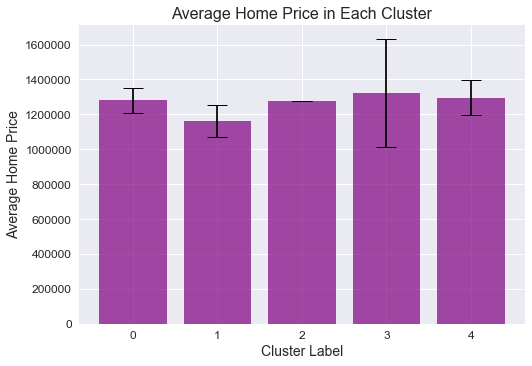

In [0]:
plt.bar(clusters_price_parks_cafes_yoga.index, clusters_price_parks_cafes_yoga["Average home price  (2017)", "mean"], 
       yerr=clusters_price_parks_cafes_yoga["Average home price  (2017)", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, color="purple")
plt.title("Average Home Price in Each Cluster", fontsize=16)
plt.ylabel("Average Home Price", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
plt.show()

### Bar grath of average number of Parks, Coffee shops, and Yoga Studios by Cluster

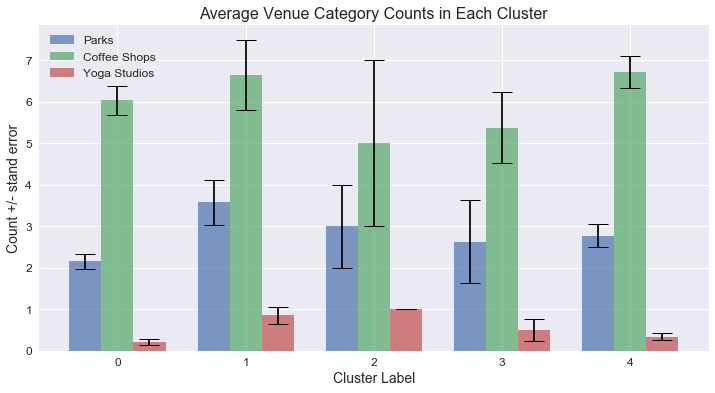

In [0]:
plt.figure(figsize=(12, 6))
width=0.25
plt.bar(clusters_price_parks_cafes_yoga.index-width, clusters_price_parks_cafes_yoga["Park", "mean"], width,           
       yerr=clusters_price_parks_cafes_yoga["Park", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Parks")
plt.bar(clusters_price_parks_cafes_yoga.index, clusters_price_parks_cafes_yoga["Coffee Shop", "mean"], width,
       yerr=clusters_price_parks_cafes_yoga["Coffee Shop", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Coffee Shops")
plt.bar(clusters_price_parks_cafes_yoga.index+width, clusters_price_parks_cafes_yoga["Yoga Studio", "mean"], width,
       yerr=clusters_price_parks_cafes_yoga["Yoga Studio", "error"], align='center',
       alpha=0.7,
       ecolor="black",
       capsize=10, label="Yoga Studios")
plt.title("Average Venue Category Counts in Each Cluster", fontsize=16)
plt.ylabel("Count +/- stand error", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.show()

### Creating the new dataframe and display the top 10 venues for each neighborhood.

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_venues = pd.DataFrame(columns=columns)
top_venues['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    top_venues.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

top_venues.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Coffee Shop,Indian Restaurant,Sandwich Place,Chinese Restaurant,Discount Store,Vietnamese Restaurant,Caribbean Restaurant,Supermarket,Park,Pizza Place
1,Agincourt South-Malvern West,Chinese Restaurant,Clothing Store,Coffee Shop,Restaurant,Shopping Mall,Sporting Goods Shop,Cosmetics Shop,Tea Room,Bank,Sandwich Place
2,Alderwood,Coffee Shop,Department Store,Restaurant,Burger Joint,Fast Food Restaurant,Café,Electronics Store,Furniture / Home Store,Pizza Place,Clothing Store
3,Annex,Italian Restaurant,Coffee Shop,Park,Café,Restaurant,Spa,Vegetarian / Vegan Restaurant,Hotel,French Restaurant,Japanese Restaurant
4,Banbury-Don Mills,Coffee Shop,Japanese Restaurant,Supermarket,Italian Restaurant,Restaurant,Burger Joint,Sandwich Place,Pizza Place,Bank,Pharmacy


### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [0]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
crime_top_venues_prices_cluster = crime_venues_prices_cluster.join(top_venues.set_index('Neighbourhood'), on='Neighbourhood').copy()
crime_top_venues_prices_cluster.head() # check the last columns!

,Cluster Labels,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road

In [0]:
crime_top_venues_prices_cluster.columns[0:20]

Index(['Cluster Labels', 'Neighbourhood', 'Population', 'Size_of_hood_area',
       'Latitude', 'Longitude', 'Assault_per_capita', 'AutoTheft_per_capita',
       'BreakandEnter_per_capita', 'Robbery_per_capita', 'Homicide_per_capita',
       'Population_Density', 'Accessories Store', 'Afghan Restaurant',
       'African Restaurant', 'American Restaurant', 'Animal Shelter',
       'Antique Shop', 'Art Gallery', 'Arts & Crafts Store'],
      dtype='object')

In [0]:
crime_top_venues_prices_cluster.shape

(140, 370)

In [0]:
crime_top_venues_prices_cluster.columns[230:286]

Index(['South American Restaurant', 'Spa', 'Speakeasy', 'Sporting Goods Shop',
       'Sports Bar', 'Sports Club', 'Steakhouse', 'Storage Facility',
       'Supermarket', 'Sushi Restaurant', 'Syrian Restaurant', 'Taco Place',
       'Tapas Restaurant', 'Tea Room', 'Tennis Court', 'Tex-Mex Restaurant',
       'Thai Restaurant', 'Theater', 'Theme Park',
       'Theme Park Ride / Attraction', 'Tibetan Restaurant',
       'Toy / Game Store', 'Trail', 'Train Station', 'Transportation Service',
       'Tree', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant',
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Wine Bar',
       'Wings Joint', 'Women's Store', 'Yoga Studio', 'Zoo', 'Zoo Exhibit',
       'Average home price  (2017)', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common 

In [0]:
crime_top_venues_only_prices_cluster = crime_top_venues_prices_cluster[['Cluster Labels', 'Neighbourhood',
       'Population', 'Size_of_hood_area', 'Latitude',
       'Longitude', 'Assault_per_capita', 'AutoTheft_per_capita',
       'BreakandEnter_per_capita', 'Robbery_per_capita', 'Homicide_per_capita',
       'Population_Density', 'Average home price  (2017)',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']].copy()

In [0]:
crime_top_venues_prices_cluster.head()

,Cluster Labels,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Assault_per_capita,AutoTheft_per_capita,BreakandEnter_per_capita,Robbery_per_capita,Homicide_per_capita,Population_Density,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Leather Goods Store,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pide Place,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road

### Calculating the Average Normalized Crime Rate to represent all 5 crime types

In [0]:
crime_top_venues_only_prices_cluster["Average Crime"] = (
    crime_top_venues_prices_cluster['Assault_per_capita']/crime_top_venues_prices_cluster['Assault_per_capita'].max() +
    crime_top_venues_prices_cluster['AutoTheft_per_capita']/crime_top_venues_prices_cluster['AutoTheft_per_capita'].max() + 
    crime_top_venues_prices_cluster['BreakandEnter_per_capita']/crime_top_venues_prices_cluster['BreakandEnter_per_capita'].max() + 
    crime_top_venues_prices_cluster['Robbery_per_capita']/crime_top_venues_prices_cluster["Robbery_per_capita"].max() +
    crime_top_venues_prices_cluster['Homicide_per_capita']/crime_top_venues_prices_cluster["Homicide_per_capita"].max())/5

In [0]:
crime_top_venues_only_prices_cluster["Average Crime"] = crime_top_venues_only_prices_cluster["Average Crime"]*100

### Plotting Average Normalized crime rate as the size of circles represents clustered neighourhoods

In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, house_price in zip(crime_venues_prices_cluster['Latitude'], 
                                  crime_venues_prices_cluster['Longitude'], 
                                  crime_venues_prices_cluster['Neighbourhood'], 
                                  crime_venues_prices_cluster['Cluster Labels'],
                                       crime_top_venues_only_prices_cluster["Average Crime"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=np.sqrt(house_price*5),
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.12)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),

        html='<div style="font-size: 12pt">Circle Area = Normalized crime rate </div>',
        )
    ).add_to(map_clusters)
       
map_clusters


### Dropping the 5 crime rate features to create a more concise summary of neighbourhoods

In [0]:
crime_top_venues_only_prices_cluster.drop(['Assault_per_capita', 'AutoTheft_per_capita',
       'BreakandEnter_per_capita', 'Robbery_per_capita', 'Homicide_per_capita'], axis=1, inplace=True)

In [0]:
crime_top_venues_only_prices_cluster.head()

,Cluster Labels,Neighbourhood,Population,Size_of_hood_area,Latitude,Longitude,Population_Density,Average home price (2017),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Crime
0,3,Yonge-St.Clair,3189,1.161315e+06,43.688762,-79.399013,2.746026,1.275567e+06,Italian Restaurant,Café,Park,Coffee Shop,Sushi Restaurant,Restaurant,American Restaurant,Grocery Store,Liquor Store,French Restaurant,54.985073
1,0,York University Heights,36764,1.324666e+07,43.759661,-79.499115,2.775342,2.621947e+06,Coffee Shop,Pizza Place,Fast Food Restaurant,Pharmacy,Falafel Restaurant,Tennis Stadium,Japanese Restaurant,Grocery Store,Shopping Mall,Bar,0.627587
2,0,Lansing-Westgate,10242,5.346186e+06,43.753880,-79.422502,1.915758,1.685373e+06,Coffee Shop,Park,Grocery Store,Café,Deli / Bodega,Pharmacy,Pizza Place,Japanese Restaurant,Restaurant,Fried Chicken Joint,9.170891
3,0,Yorkdale-Glen Park,18233,6.038326e+06,43.717458,-79.452711,3.019546,9.409290e+05,Clothing Store,Coffee Shop,Fast Food Restaurant,Furniture / Home Store,Dessert Shop,Restaurant,Grocery Store,Pet Store,Cosmetics Shop,Sushi Restaurant,4.039170
4,0,Stonegate-Queensway,22207,7.946202e+06,43.636838,-79.496012,2.794669,8.229920e+05,Coffee Shop,Italian Restaurant,Sushi Restaurant,Bank,Pizza Place,Pub,Park,Café,Dessert Shop,Bakery,1.652471


### Exploring clusters

In [0]:
table_df =pd.DataFrame(crime_top_venues_only_prices_cluster.groupby('Cluster Labels', as_index=False)["Neighbourhood"].count())
table_df.rename(columns={"Neighbourhood": "Number of Neighbourhoods"})

,Cluster Labels,Number of Neighbourhoods
0,0,72
1,1,14
2,2,2
3,3,8
4,4,44


In [0]:
crime_top_venues_only_prices_cluster.loc[
    crime_top_venues_only_prices_cluster['Cluster Labels'] == 0, 
    crime_top_venues_only_prices_cluster.columns[[1] + 
    list(range(5, crime_top_venues_only_prices_cluster.shape[1]))]]["1st Most Common Venue"].value_counts()[0:10]

Coffee Shop             39
Fast Food Restaurant     7
Pizza Place              4
Park                     3
Chinese Restaurant       3
Greek Restaurant         2
Grocery Store            2
Clothing Store           2
Korean Restaurant        2
Café                     2
Name: 1st Most Common Venue, dtype: int64

In [0]:
crime_top_venues_only_prices_cluster.loc[
    crime_top_venues_only_prices_cluster['Cluster Labels'] == 4, 
    crime_top_venues_only_prices_cluster.columns[[1] + 
    list(range(5, crime_top_venues_only_prices_cluster.shape[1]))]]["1st Most Common Venue"].value_counts()[0:10]

Coffee Shop             18
Café                    10
Italian Restaurant       6
Fast Food Restaurant     2
Sushi Restaurant         1
Greek Restaurant         1
Park                     1
Korean Restaurant        1
Grocery Store            1
Chinese Restaurant       1
Name: 1st Most Common Venue, dtype: int64

In [0]:
crime_top_venues_only_prices_cluster.loc[
    crime_top_venues_only_prices_cluster['Cluster Labels'] == 1, 
    crime_top_venues_only_prices_cluster.columns[[1] + 
    list(range(5, crime_top_venues_only_prices_cluster.shape[1]))]]["1st Most Common Venue"].value_counts()[0:10]

Café                  5
Coffee Shop           3
Bar                   2
Italian Restaurant    2
Park                  1
Korean Restaurant     1
Name: 1st Most Common Venue, dtype: int64

### Exploring average Crime Rate and Population Density in each cluster

In [0]:
pop_crime_clusters = pd.DataFrame(
    crime_top_venues_only_prices_cluster.groupby(
        "Cluster Labels", as_index=False)[
        "Cluster Labels","Population_Density", "Average Crime"].describe())

In [0]:
pop_crime_clusters

Cluster Labels                                    Population_Density  \
           count mean  std  min  25%  50%  75%  max              count   
0           72.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               72.0   
1           14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0               14.0   
2            2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0                2.0   
3            8.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0                8.0   
4           44.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0               44.0   

                                                                               \
        mean       std        min        25%        50%        75%        max   
0   3.391332  1.244026   0.839511   2.444675   3.545877   4.471487   5.184260   
1  13.359148  2.395544  10.846162  11.473040  12.708295  14.739712  18.633067   
2  29.301789  3.611492  26.748078  28.024933  29.301789  30.578644  31.855499   
3   2.543100  1.486470   1.199872   1.699717   2.270945   2.740525   5.932899   
4   7.158123  1.354413   5.311935   6.014834   7.094507   8.059822  10.047043   

  Average Crime                                                         \
          count       mean        std        min        25%        50%   
0          72.0   4.961064   5.126135   0.108411   0.917648   3.498047   
1          14.0   2.237054   2.189540   0.195973   0.512407   0.993215   
2           2.0   3.667911   4.020183   0.825212   2.246561   3.667911   
3           8.0  45.230260  11.164344  32.569354  37.787816  40.974270   
4          44.0   4.165014   5.267625   0.143958   0.898458   2.468118   

                         
         75%        max  
0   8.062445  20.472058  
1   3.847066   7.306593  
2   5.089260   6.510610  
3  55.533469  61.917481  
4   4.296778  24.956458

In [0]:
pop_crime_clusters["Population_Density", "error"] = pop_crime_clusters[
    "Population_Density", "std"]/ np.sqrt(pop_crime_clusters["Population_Density", "count"])
pop_crime_clusters["Average Crime", "error"] = pop_crime_clusters[
    "Average Crime", "std"]/ np.sqrt(pop_crime_clusters["Average Crime", "count"])

In [0]:
pop_crime_clusters

Cluster Labels                                    Population_Density  \
           count mean  std  min  25%  50%  75%  max              count   
0           72.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0               72.0   
1           14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0               14.0   
2            2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0                2.0   
3            8.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0                8.0   
4           44.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0               44.0   

                                                                               \
        mean       std        min        25%        50%        75%        max   
0   3.391332  1.244026   0.839511   2.444675   3.545877   4.471487   5.184260   
1  13.359148  2.395544  10.846162  11.473040  12.708295  14.739712  18.633067   
2  29.301789  3.611492  26.748078  28.024933  29.301789  30.578644  31.855499   
3   2.543100  1.486470   1.199872   1.699717   2.270945   2.740525   5.932899   
4   7.158123  1.354413   5.311935   6.014834   7.094507   8.059822  10.047043   

  Average Crime                                                         \
          count       mean        std        min        25%        50%   
0          72.0   4.961064   5.126135   0.108411   0.917648   3.498047   
1          14.0   2.237054   2.189540   0.195973   0.512407   0.993215   
2           2.0   3.667911   4.020183   0.825212   2.246561   3.667911   
3           8.0  45.230260  11.164344  32.569354  37.787816  40.974270   
4          44.0   4.165014   5.267625   0.143958   0.898458   2.468118   

                        Population_Density Average Crime  
         75%        max              error         error  
0   8.062445  20.472058           0.146610      0.604121  
1   3.847066   7.306593           0.640236      0.585179  
2   5.089260   6.510610           2.553710      2.842699  
3  55.533469  61.917481           0.525547      3.947192  
4   4.296778  24.956458           0.204185      0.794124

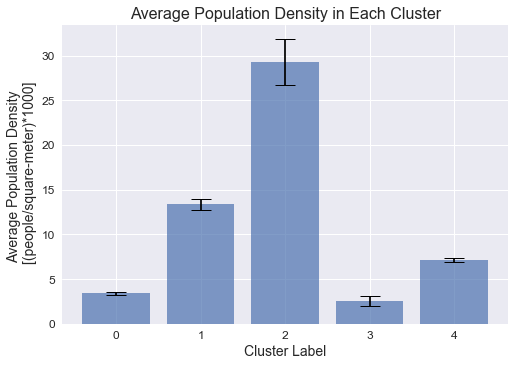

In [0]:
plt.bar(pop_crime_clusters.index, pop_crime_clusters["Population_Density", "mean"], 
       yerr=pop_crime_clusters["Population_Density", "error"], align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10)
plt.title("Average Population Density in Each Cluster", fontsize=16)
plt.ylabel("Average Population Density \n [(people/square-meter)*1000]", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
plt.show()

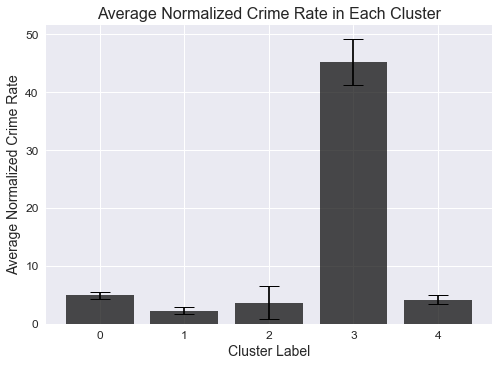

In [0]:
plt.bar(pop_crime_clusters.index, pop_crime_clusters["Average Crime", "mean"], 
       yerr=pop_crime_clusters["Average Crime", "error"], align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, color="black")
plt.title("Average Normalized Crime Rate in Each Cluster", fontsize=16)
plt.ylabel("Average Normalized Crime Rate", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
plt.show()

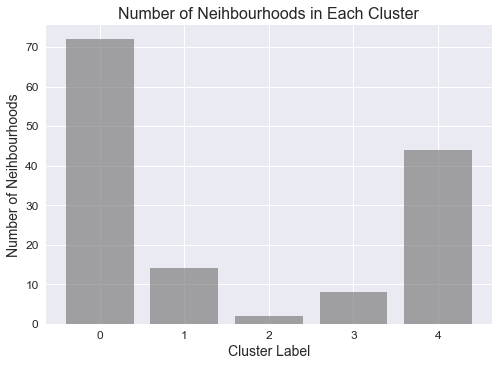

In [0]:
plt.bar(pop_crime_clusters.index, pop_crime_clusters["Average Crime", "count"], 
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, color="grey")
plt.title("Number of Neihbourhoods in Each Cluster", fontsize=16)
plt.ylabel("Number of Neihbourhoods", fontsize=14)
plt.xlabel("Cluster Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
plt.show()

### Exploring Cluster "0". Filtering out neighbourhoods that have an average home price of greater than $800,000, and a crime rate of greater than 4. 

In [0]:
crime_top_venues_prices_cluster[crime_top_venues_prices_cluster['Neighbourhood'] == "Forest Hill South"]["Average home price  (2017)"]

54    1319395.0
Name: Average home price  (2017), dtype: float64

In [0]:
crime_top_venues_prices_cluster[crime_top_venues_prices_cluster['Neighbourhood'] == "Forest Hill South"]["Population_Density"]

54    5.014873
Name: Population_Density, dtype: float64

In [0]:
hoods_fit_for_me = crime_top_venues_only_prices_cluster[(
    crime_top_venues_prices_cluster['Cluster Labels'] == 0) & 
    (crime_top_venues_prices_cluster["Average home price  (2017)"] < 800000.0)].drop(
    ["Size_of_hood_area", '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'], axis=1)

In [0]:
hoods_fit_for_me.columns

Index(['Cluster Labels', 'Neighbourhood', 'Population', 'Latitude',
       'Longitude', 'Population_Density', 'Average home price  (2017)',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', 'Average Crime'],
      dtype='object')

In [0]:
hoods_fit_for_me = hoods_fit_for_me[['Neighbourhood',  'Population_Density', 'Average Crime', 
                                     'Average home price  (2017)',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', 'Latitude',
       'Longitude']]

In [0]:
hoods_fit_for_me

,Neighbourhood,Population_Density,Average Crime,Average home price (2017),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
19,Humber Summit,1.780867,2.251131,706722.0,Coffee Shop,Bank,Park,Asian Restaurant,Hardware Store,43.756657,-79.570138
20,Humbermede,1.363514,7.374925,772315.0,Coffee Shop,Fast Food Restaurant,Indian Restaurant,Caribbean Restaurant,Pizza Place,43.741473,-79.551884
34,Glenfield-Jane Heights,5.074424,1.547167,745701.0,Pizza Place,Grocery Store,Vietnamese Restaurant,Fast Food Restaurant,Coffee Shop,43.745591,-79.505161
43,Kennedy Park,5.083607,6.414137,729499.0,Grocery Store,Coffee Shop,Pharmacy,Discount Store,Chinese Restaurant,43.726791,-79.260034
77,Eglinton East,1.956474,9.094528,631198.0,Fast Food Restaurant,Sandwich Place,Pizza Place,Pharmacy,Grocery Store,43.743029,-79.245636
83,L'Amoreaux,4.154920,0.529240,784794.0,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Pharmacy,Sandwich Place,43.791460,-79.309635
89,Birchcliffe-Cliffside,4.332918,0.846891,725980.0,Coffee Shop,Thai Restaurant,Golf Course,Liquor Store,Beer Store,43.688760,-79.262795
94,Black Creek,4.991857,20.217846,730270.0,Coffee Shop,Fast Food Restaurant,Pizza Place,Hotel,Japanese Restaurant,43.765908,-79.513970
111,Woburn,2.830533,0.206713,746787.0,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Pizza Place,Bank,43.765936,-79.223175
118,Weston,4.452868,4.539476,729035.0,Fast Food Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Grocery Store,43.703800,-79.522170


#### Plotting the 11 neighbourhoods in Cluster 0 that have an average home price of less than $800,000

In [0]:
# create map of New York using latitude and longitude values
toronto_hood_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, crime in zip(hoods_fit_for_me['Latitude'], 
                                              hoods_fit_for_me['Longitude'], 
                                              hoods_fit_for_me['Neighbourhood'],
                                             hoods_fit_for_me['Average Crime']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(crime*50),
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_hood_map)  

folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.04)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt">Circle Area = Normalized crime rate (Home price < 800k) </div>',
        )
    ).add_to(toronto_hood_map)
    
toronto_hood_map

In [0]:
hoods_fit_for_me = hoods_fit_for_me[hoods_fit_for_me['Average Crime'] < 4]

# Plotting and summarizing the winners: 6 neighbourhoods from Cluster 0 than have an average home price of less than $800,000 and a normalized crime rate of less than 4.

In [0]:
# create map of New York using latitude and longitude values
toronto_hood_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, crime in zip(hoods_fit_for_me['Latitude'], 
                                              hoods_fit_for_me['Longitude'], 
                                              hoods_fit_for_me['Neighbourhood'],
                                             hoods_fit_for_me['Average Crime']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=np.sqrt(crime*50),
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_hood_map)  
    
folium.map.Marker(
    [(43.694286-0.09), (-79.412848+.10)],
    icon=DivIcon(
        icon_size=(1000,100),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt">Circle Area = Normalized crime rate (< 4) </div>',
        )
    ).add_to(toronto_hood_map)
    
toronto_hood_map

In [0]:
hoods_fit_for_me

,Neighbourhood,Population_Density,Average Crime,Average home price (2017),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
19,Humber Summit,1.780867,2.251131,706722.0,Coffee Shop,Bank,Park,Asian Restaurant,Hardware Store,43.756657,-79.570138
34,Glenfield-Jane Heights,5.074424,1.547167,745701.0,Pizza Place,Grocery Store,Vietnamese Restaurant,Fast Food Restaurant,Coffee Shop,43.745591,-79.505161
83,L'Amoreaux,4.154920,0.529240,784794.0,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Pharmacy,Sandwich Place,43.791460,-79.309635
89,Birchcliffe-Cliffside,4.332918,0.846891,725980.0,Coffee Shop,Thai Restaurant,Golf Course,Liquor Store,Beer Store,43.688760,-79.262795
111,Woburn,2.830533,0.206713,746787.0,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Pizza Place,Bank,43.765936,-79.223175
122,Malvern,4.042411,0.872694,692097.0,Fast Food Restaurant,Pharmacy,Pizza Place,Grocery Store,Sandwich Place,43.803431,-79.222301


In [0]:
np.array(hoods_fit_for_me["Neighbourhood"])

array(['Humber Summit', 'Glenfield-Jane Heights', "L'Amoreaux",
       'Birchcliffe-Cliffside', 'Woburn', 'Malvern'], dtype=object)

# The End!